<a href="https://colab.research.google.com/github/risay7/q-macro/blob/main/the_latest_of_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# Penn World Tableの最新データを読み込む
url = 'https://www.rug.nl/ggdc/docs/pwt91.dta'
pwt_data = pd.read_stata(url)

# OECD諸国リスト
oecd_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Denmark", "Finland", "France",
    "Germany", "Greece", "Iceland", "Ireland", "Italy", "Japan", "Netherlands",
    "New Zealand", "Norway", "Portugal", "Spain", "Sweden", "Switzerland",
    "United Kingdom", "United States"
]

# 必要なデータを抽出
data = pwt_data.loc[
    (pwt_data['country'].isin(oecd_countries)) &
    (pwt_data['year'] >= 1960) &
    (pwt_data['year'] <= 2000),
    ['country', 'year', 'rgdpna', 'cn', 'emp', 'rtfpna']
]

# 1960年と2000年のデータのみを取得
data_1960 = data[data['year'] == 1960]
data_2000 = data[data['year'] == 2000]

# マージして成長率を計算
data_merged = pd.merge(data_1960, data_2000, on='country', suffixes=('_1960', '_2000'))
data_merged['growth_rate'] = ((data_merged['rgdpna_2000'] / data_merged['rgdpna_1960']) ** (1/40) - 1) * 100
data_merged['tfp_growth'] = ((data_merged['rtfpna_2000'] / data_merged['rtfpna_1960']) ** (1/40) - 1) * 100
data_merged['capital_deepening'] = ((data_merged['cn_2000'] / data_merged['cn_1960']) ** (1/40) - 1) * 100

# TFPシェアと資本シェアの計算（仮の計算方法）
data_merged['tfp_share'] = data_merged['rtfpna_2000'] / data_merged['rtfpna_1960']
data_merged['capital_share'] = 1 - data_merged['tfp_share']

# 最終表の整形
final_data = data_merged[['country', 'growth_rate', 'tfp_growth', 'capital_deepening', 'tfp_share', 'capital_share']]
final_data.loc[:, 'tfp_share'] = final_data['tfp_share'].round(2)  # データの丸め
final_data.loc[:, 'capital_share'] = final_data['capital_share'].round(2)

# 表の表示
print(final_data)

# データを視覚的に表示
import matplotlib.pyplot as plt

           country  growth_rate  tfp_growth  capital_deepening  tfp_share  \
0        Australia     3.698826    0.568473           4.338491       1.25   
1          Austria     3.282833    1.404119           5.292571       1.75   
2          Belgium     3.134620    1.581669           3.280509       1.87   
3           Canada     3.643394    0.689554           4.791117       1.32   
4      Switzerland     2.338743    0.447547           3.110337       1.20   
5          Germany     2.898598    1.597488           3.699970       1.89   
6          Denmark     2.948642    0.957847           3.674746       1.46   
7            Spain     4.249275    1.584947           6.049156       1.88   
8          Finland     3.484118    1.690602           4.123867       1.96   
9           France     3.482664    1.645494           3.496802       1.92   
10  United Kingdom     2.619016    0.725138           3.267658       1.34   
11          Greece     4.011536    1.142526           5.297863       1.58   

これらのデータを視覚的に表示するために以下にヒストグラムをかきました。

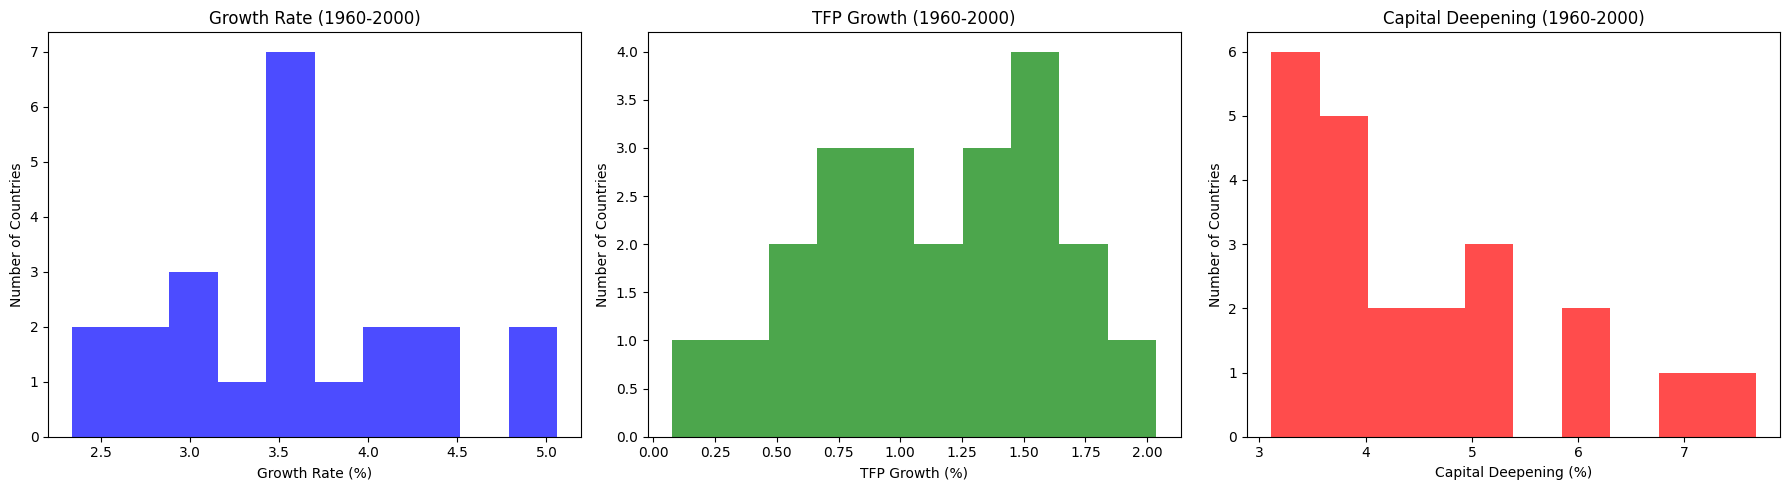

In [5]:
# 各成長率のヒストグラムをプロット
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(final_data['growth_rate'], bins=10, color='blue', alpha=0.7)
axes[0].set_title('Growth Rate (1960-2000)')
axes[0].set_xlabel('Growth Rate (%)')
axes[0].set_ylabel('Number of Countries')

axes[1].hist(final_data['tfp_growth'], bins=10, color='green', alpha=0.7)
axes[1].set_title('TFP Growth (1960-2000)')
axes[1].set_xlabel('TFP Growth (%)')
axes[1].set_ylabel('Number of Countries')

axes[2].hist(final_data['capital_deepening'], bins=10, color='red', alpha=0.7)
axes[2].set_title('Capital Deepening (1960-2000)')
axes[2].set_xlabel('Capital Deepening (%)')
axes[2].set_ylabel('Number of Countries')

plt.tight_layout()
plt.show()

ヒストグラムを見てわかったこと

・成長率は国によって異なるが、大多数は3.0%から4.0%の間で成長している。

・TFP成長率も国によって異なるが、大多数は0.75%から1.75%の範囲で成長している。

・資本深化率は最も広範囲にわたるが、3.0%から5.0%の間に集中している。

これらの結果は、OECD諸国の経済成長が主にTFPの成長と資本深化によって支えられていることを示している。各国の成長率のばらつきは、各国の政策や経済状況の違いによるものであると考え、各国の政策や経済状況を理解することでよりこのグラフの真相を理解することができるようになると考えたので、この課題とは別に機会があったらそういった政策なども調べて理解を深めたいなと思いました。